<a href="https://colab.research.google.com/github/tonysjeon/teresa-project/blob/main/TERESA_Mini_Project_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TERESA Mini-Project**
Your goals are to:
- develop a method to take in noisy sensor data in real time and filter out the noise (e.g. low pass filters, moving average, Kalman filters)
- determine performance of your algorithm (e.g. time complexity, time to process, etc.)
- quantify how well it removes noise (e.g. RMSE, MAE, etc.)



---


**Provided Data:**

```noisy_data``` is a dataframe that contains the noisy data

```true_data``` is a dataframe that contains the "true" signal. Use it to compare how well your filter works!



In [1]:
# Import some cool libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'pandas'

In [ ]:
# Load sample data
noisy_data = pd.read_csv("https://drive.google.com/uc?export=download&id=1m3jCdWvTimvq37fJaB3Z_IQUq1O0qLi_", header=None, names=["time", "pitch", "yaw"])
true_data = pd.read_csv("https://drive.google.com/uc?export=download&id=1cGO3tPPuUvKQpd5KOwV81pxH5ulchgKJ", header=None, names=["time", "pitch", "yaw", "roll"])[:900]


In [ ]:
noisy_data.head()

,time,pitch,yaw
0,0.009891,0.417106,-0.245672
1,0.022095,0.520559,-0.090946
2,0.033102,1.266106,0.421038
3,0.044104,-0.296821,-0.525818
4,0.056437,0.937134,-0.211922


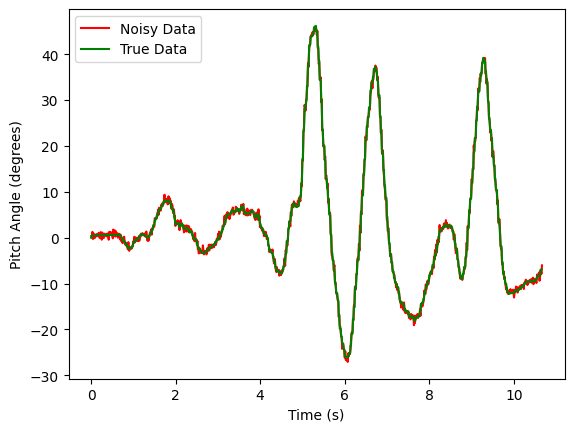

In [ ]:
plt.plot(noisy_data['time'], noisy_data['pitch'], label='Noisy Data', color='Red')
plt.plot(true_data['time'], true_data['pitch'], label='True Data', color='Green')
plt.xlabel("Time (s)")
plt.ylabel("Pitch Angle (degrees)")
plt.legend()

In [ ]:
from scipy.signal import butter, filtfilt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Moving average filter
def moving_average(data, window_size=10):
    filtered = data.rolling(window=window_size).mean()
    filtered = filtered.fillna(method='bfill')  # Handle initial NaN values
    return filtered

# Low-pass Butterworth filter
def butterworth_lowpass(data, cutoff=0.1, fs=1.0, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered = filtfilt(b, a, data)  # Apply filter
    return filtered

# Apply the moving average filter
filtered_pitch_ma = moving_average(noisy_data['pitch'])

# Apply the Butterworth filter
filtered_pitch_bw = butterworth_lowpass(noisy_data['pitch'], cutoff=0.1, fs=1.0, order=5)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(noisy_data['time'], noisy_data['pitch'], label='Noisy Data', color='red', alpha=0.5)
plt.plot(true_data['time'], true_data['pitch'], label='True Data', color='green', alpha=0.8)
plt.plot(noisy_data['time'], filtered_pitch_ma, label='Filtered Data (Moving Average)', color='purple')
plt.plot(noisy_data['time'], filtered_pitch_bw, label='Filtered Data (Butterworth)', color='blue')
plt.title("Filter Comparison")
plt.xlabel("Time")
plt.ylabel("Pitch")
plt.legend()
plt.show()

# Helper function to evaluate filters
def evaluate(true_data, filtered_data):
    rmse = np.sqrt(mean_squared_error(true_data, filtered_data))
    mae = mean_absolute_error(true_data, filtered_data)
    return rmse, mae

# Evaluate moving average filter
rmse_ma, mae_ma = evaluate(true_data['pitch'][:len(filtered_pitch_ma)], filtered_pitch_ma)

# Evaluate Butterworth filter
rmse_bw, mae_bw = evaluate(true_data['pitch'][:len(filtered_pitch_bw)], filtered_pitch_bw)

# Print results
print(f"Moving Average Filter - RMSE: {rmse_ma}, MAE: {mae_ma}")
print(f"Butterworth Filter - RMSE: {rmse_bw}, MAE: {mae_bw}")